# EMPLOYEE TURNOVER PREDICTION

## OBJECTIVE OF PROJECT:

Employee Turnover Prediction project is to construct an accurate predictive model that anticipates employee attrition. By analyzing historical employee data, encompassing job satisfaction, salary, work environment, and performance metrics, the model aims to identify employees at risk of leaving the organization. The objective is to provide actionable insights to Human Resources for implementing targeted retention strategies. This involves data preprocessing, feature engineering, and leveraging machine learning to build a robust predictive model, ultimately aiding organizations in reducing turnover rates and enhancing workplace productivity.

 

### Import  packages: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from scipy import stats as st
import statsmodels as stm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,classification_report
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset:

In [2]:
df = pd.read_csv('Employee turnover prediction.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
#Fixing and formatting column names
df.rename(columns={'Work_accident':'work_accident','average_montly_hours':'average_monthly_hours','Department':'department'},inplace=True)


In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.shape

(14999, 10)

In [9]:
# checking for null values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

From the above it can be seen that the dataset does not contain null values

### Statistical summary: 

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,NaN,NaN,NaN,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_monthly_hours,14999.0,NaN,NaN,NaN,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,NaN,NaN,NaN,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0
work_accident,14999.0,NaN,NaN,NaN,0.14461,0.351719,0.0,0.0,0.0,0.0,1.0
left,14999.0,NaN,NaN,NaN,0.238083,0.425924,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,NaN,NaN,NaN,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0
department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory data analysis (EDA)


<AxesSubplot:xlabel='left', ylabel='count'>

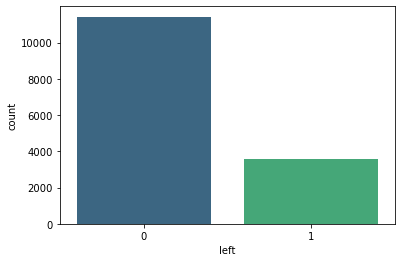

In [11]:
sns.countplot(data=df,x='left',palette='viridis')


The target variable 'left' is imbalanced with employee left (i.e = 1) being the minority one.

In [12]:
#percentage of each target variable
df['left'].value_counts()/len(df)


0    0.761917
1    0.238083
Name: left, dtype: float64

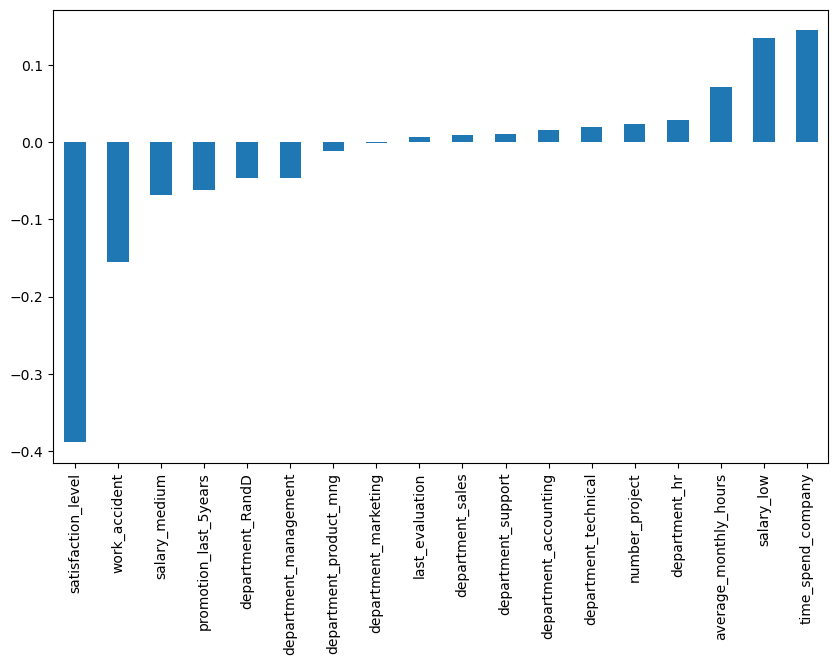

In [13]:
# checking the correlation of all other features with target variable
plt.figure(figsize=(10,6),dpi=100)
pd.get_dummies(df,drop_first=True).corr()['left'].sort_values()[:-1].plot(kind='bar');


 It can be seen that the satisfaction_level, work_accident have high negative correlation, whereas the features average_monthly_hours, salary_low and time_spend_company are postively correlated with target variable.



<AxesSubplot:>

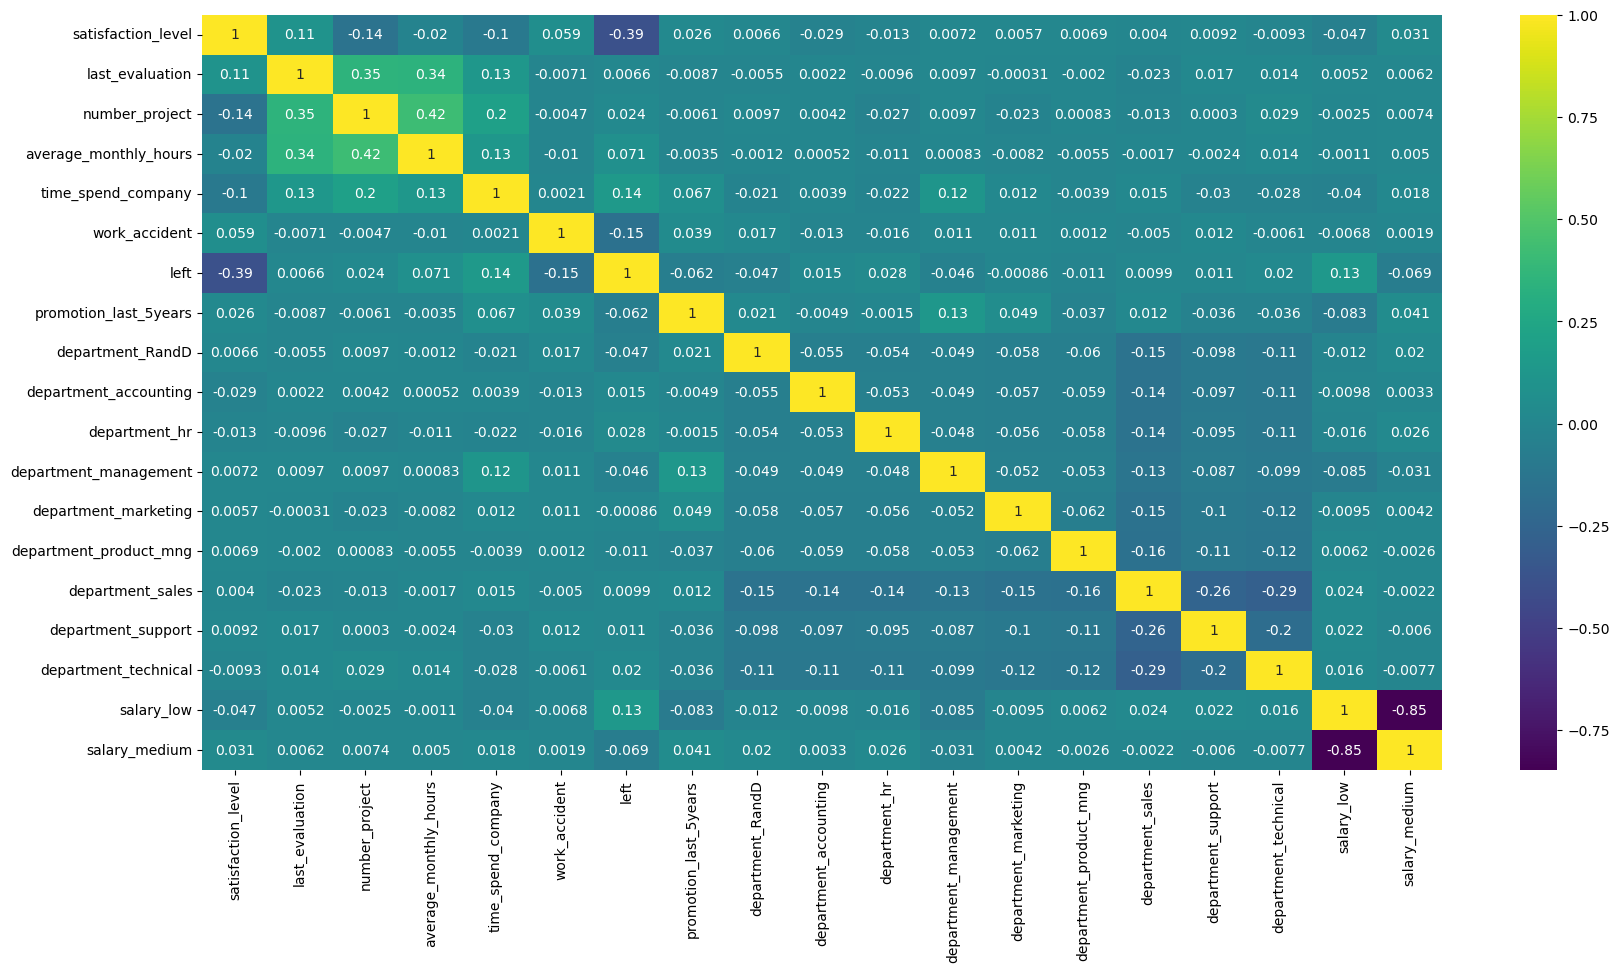

In [14]:
#Plotting heatmap for visualizing the correlation between the features
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(data=pd.get_dummies(df,drop_first=True).corr(),cmap='viridis',annot=True)


<AxesSubplot:xlabel='department', ylabel='count'>

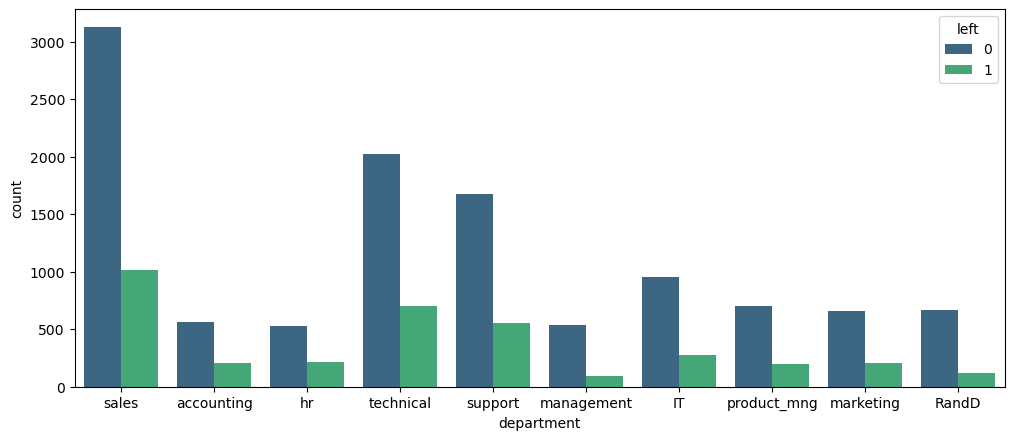

In [15]:
#Employees count per each department
plt.figure(figsize=(12,5),dpi=100)
sns.countplot(data=df,x='department',hue='left',palette='viridis')


The highest employee turnover is from sales and technical departments.On the other hand management and RandD have least turnover.

<AxesSubplot:xlabel='salary', ylabel='count'>

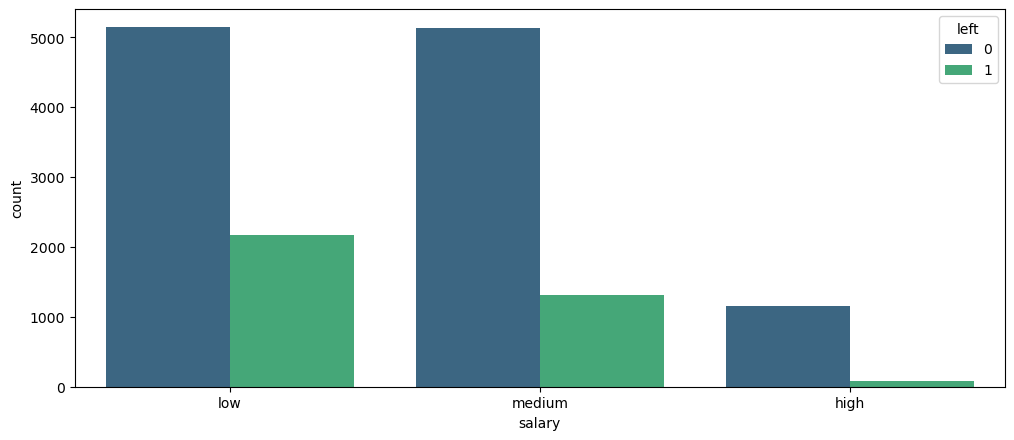

In [16]:
#Employees count per salary category
plt.figure(figsize=(12,5),dpi=100)
sns.countplot(data=df,x='salary',hue='left',palette='viridis')


Majority of the employees who fall under the low salary category have left the company.

<AxesSubplot:xlabel='work_accident', ylabel='count'>

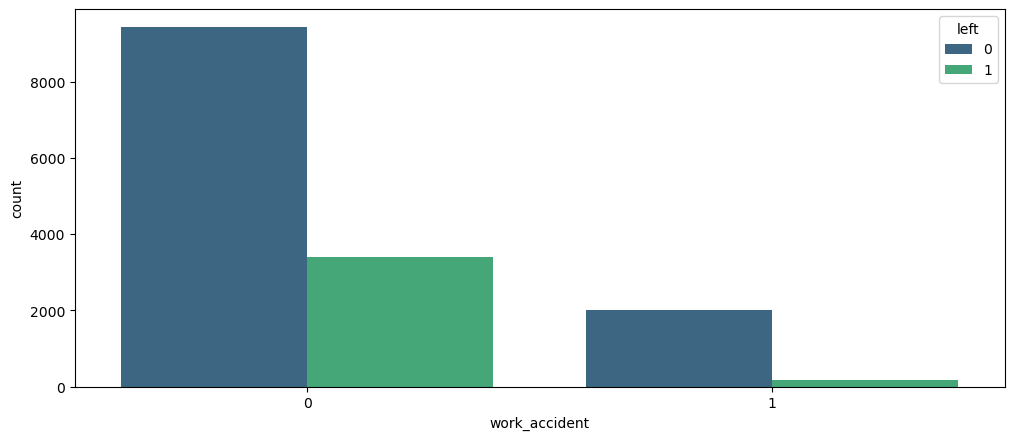

In [17]:
#Employees count based on work accident
plt.figure(figsize=(12,5),dpi=100)
sns.countplot(data=df,x='work_accident',hue='left',palette='viridis')


The percentage of employees who had an accident at work and left the company is very less.

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

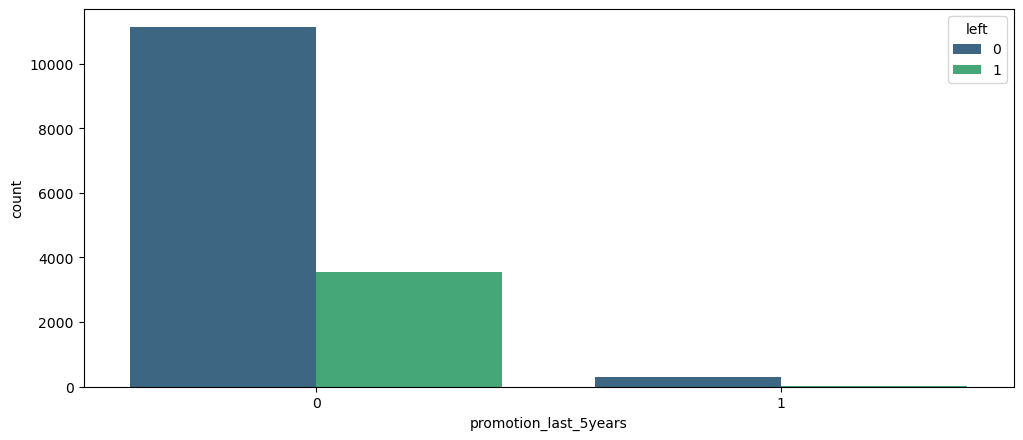

In [18]:
#Employees count based on promotion
plt.figure(figsize=(12,5),dpi=100)
sns.countplot(data=df,x='promotion_last_5years',hue='left',palette='viridis')

The number of people who have got promotion in the last 5 years is in hundreds and about 30% employees who weren't promoted have left the firm.



<AxesSubplot:xlabel='average_monthly_hours', ylabel='Count'>

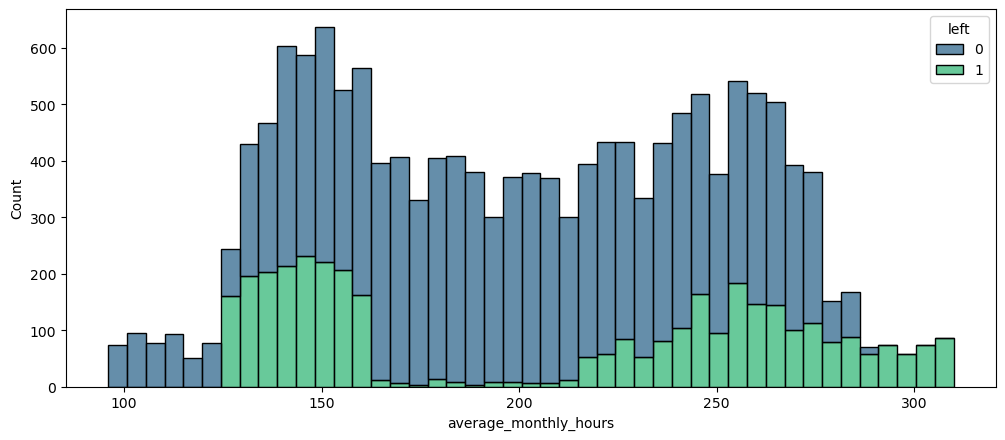

In [19]:
# Plotting the distribution of average monthly hours
plt.figure(figsize=(12,5),dpi=100)
sns.histplot(data=df,x='average_monthly_hours',bins=45,hue='left',multiple='stack',palette='viridis')


It can be seen that employees who had to work more than 220 average monthly hours have left the firm, also the employees having around 150 hours on average per month might have let go from the firm.



<AxesSubplot:xlabel='department', ylabel='satisfaction_level'>

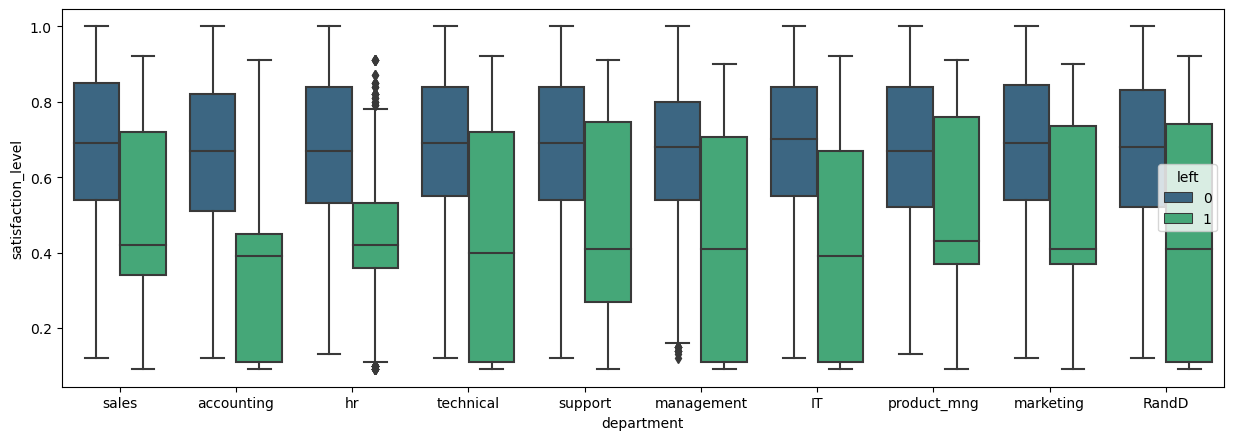

In [20]:
# plotting boxplots for each department to visualize the satisfaction level distribution
plt.figure(figsize=(15,5),dpi=100)
sns.boxplot(data=df,x='department',y='satisfaction_level',hue='left',palette='viridis')


There are few outliers for hr and management departments.

<AxesSubplot:xlabel='salary', ylabel='last_evaluation'>

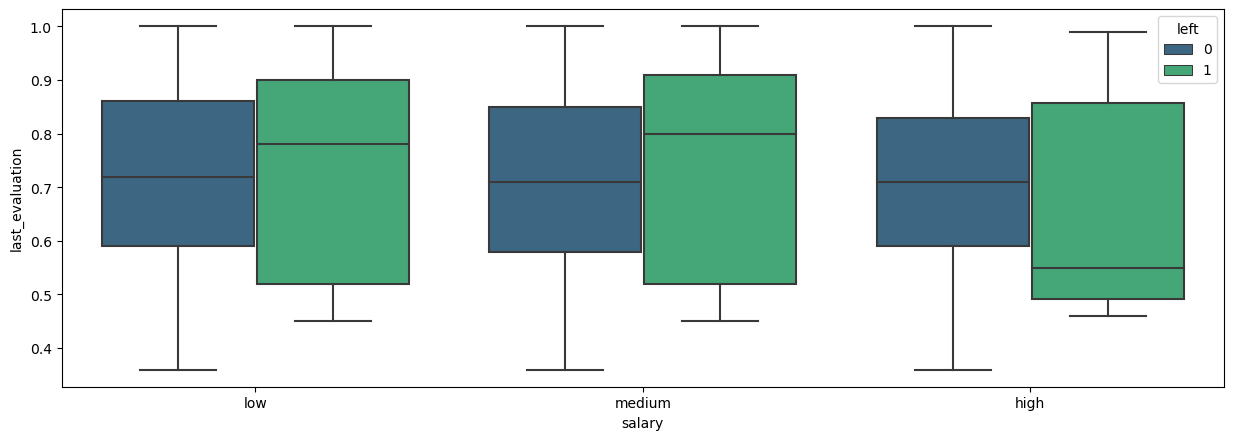

In [21]:
# plotting boxplots for each salary category to visualize the employees last performance review distribution
plt.figure(figsize=(15,5),dpi=100)
sns.boxplot(data=df,x='salary',y='last_evaluation',hue='left',palette='viridis')


The employee who had last performance review with median of 0.8 but were falling in low and medium salary category have left the firm. Also, the employees with median performance less than .6 but were in high salary category might have been let go from the firm.

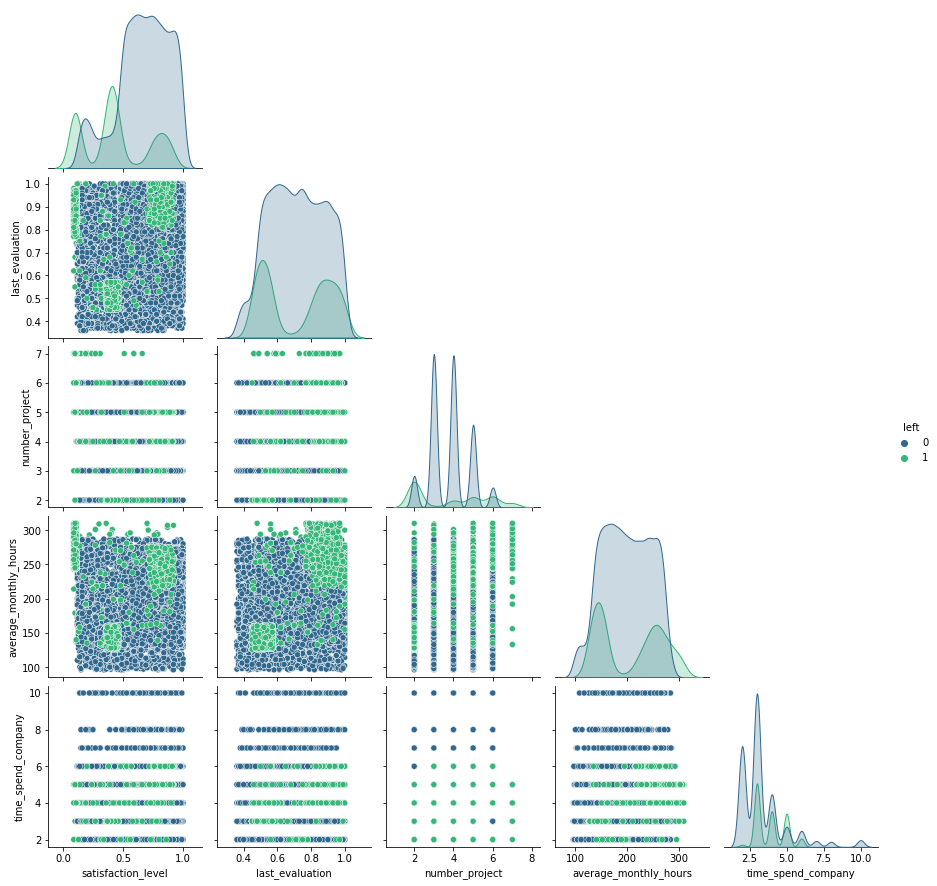

In [22]:
#plotting pair plot between 'satisfaction_level','last_evaluation','number_project','average_monthly_hours','time_spend_company','left'
sns.pairplot(df[['satisfaction_level','last_evaluation','number_project','average_monthly_hours','time_spend_company','left']],corner=True,hue='left',palette='viridis');


### Hypothesis testing 

<AxesSubplot:xlabel='department', ylabel='satisfaction_level'>

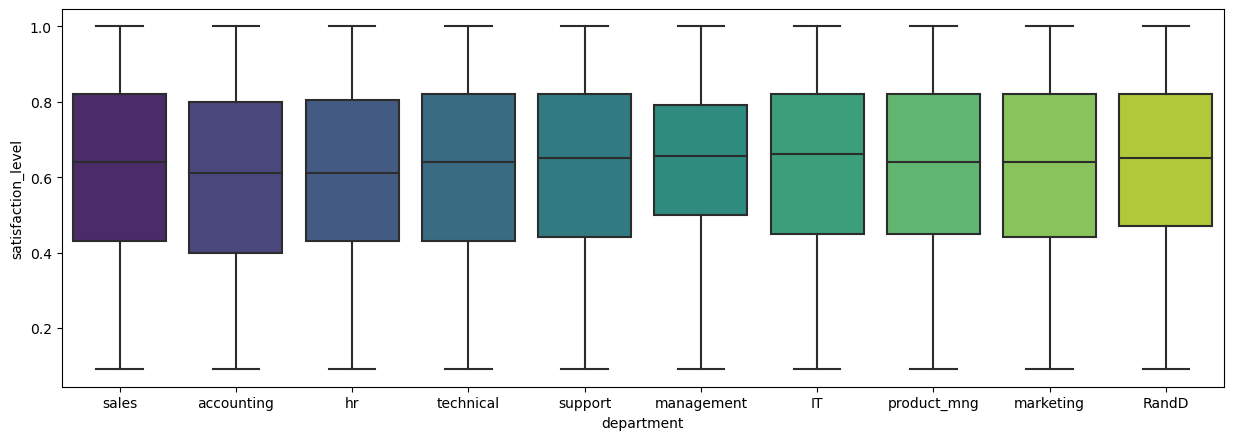

In [23]:
#checking the satisfaction level feature for each department
plt.figure(figsize=(15,5),dpi=100)
sns.boxplot(data=df,x='department',y='satisfaction_level',palette='viridis')


<AxesSubplot:xlabel='salary', ylabel='satisfaction_level'>

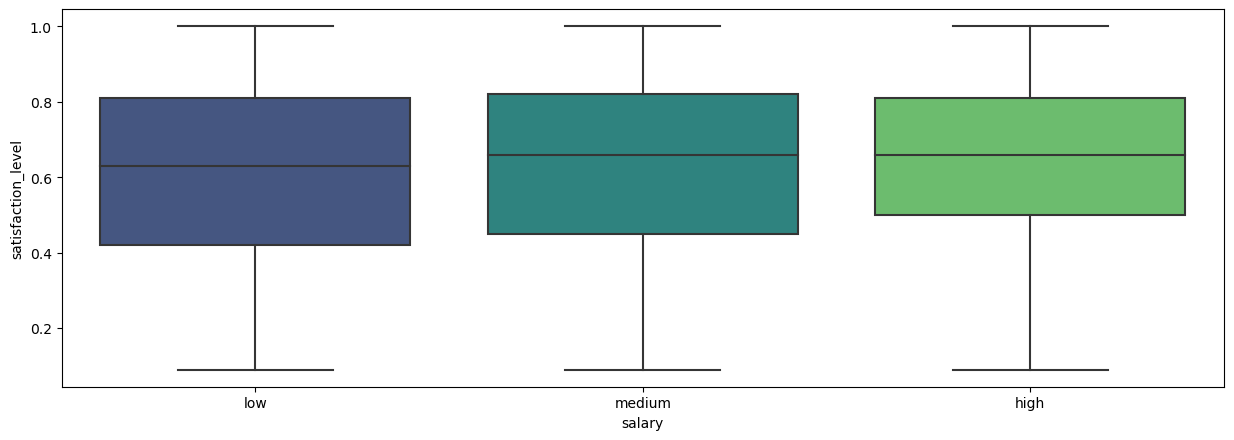

In [24]:
#checking the satisfaction level feature for each salary category
plt.figure(figsize=(15,5),dpi=100)
sns.boxplot(data=df,x='salary',y='satisfaction_level',palette='viridis')

#### One-way ANOVA hypothesis testing: 

In [25]:
# to see if there is a statiscal significance between satisfaction level and department.
model = ols(formula="satisfaction_level ~ C(department)",data=df).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.158
Date:                Wed, 22 Nov 2023   Prob (F-statistic):             0.0219
Time:                        00:07:13   Log-Likelihood:                -397.04
No. Observations:               14999   AIC:                             814.1
Df Residuals:                   14989   BIC:                             890.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.6181      0.007     87.118      0.000       0.604       0.632
C(department)[T.RandD]           0.0017      0.011      0.148      0.882      -0.021       0.024
C(department)[T.accounting]     -0.0360      0.011     -3.146      0.002      -0.058      -0.014
C(department)[T.hr]             -0.0193      0.012     -1.670      0.095      -0.042       0.003
C(department)[T.management]      0.0032      0.012      0.263      0.792      -0.021       0.027
C(department)[T.marketing]       0.0005      0.011      0.042      0.967      -0.021       0.022
C(department)[T.product_mng]     0.0015      0.011      0.137      0.891      -0.020       0.023
C(department)[T.sales]          -0.0037      0.008     -0.457      0.647      -0.020       0.012
C(department)[T.support]         0.0002      0.009      0.018      0.986      -0.017       0.017
C(department)[T.technical]      -0.0102      0.009     -1.199      0.231      -0.027       0.007
==============================================================================
Omnibus:                     1188.172   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              841.785
Skew:                          -0.474   Prob(JB):                    1.62e-183
Kurtosis:                       2.332   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It can be seen from above summary that there is a statistical significance between satisfaction level and department. But it is unclear if satisfaction level varies between the departments.



#### Stating null and alternative hypothesis

Ho (Null hypthesis): There is no difference in satisfaction level for each department.
Ha (Alternative hypothesis): There is a difference in satisfaction level for each department.

In [27]:
sm.stats.anova_lm(model,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(department),9.0,1.200020,0.133336,2.158432,0.021865
Residual,14989.0,925.934355,0.061774,NaN,NaN


#### One way ANOVA results

P value .02 is less than .05

We can reject the null hypothesis. That means, there is a difference in satisfaction level for each department. 

### Two-way ANOVA hypthesis testing: 

In [28]:
# to check the possible interaction between department and salary variables
model2 = ols(formula="satisfaction_level ~ C(department) + C(salary) + C(department):C(salary)",data=df).fit()


#### Stating null and alternative hypotheses

department

Ho (Null hypthesis): There is no difference in satisfaction level for each department.
Ha (Alternative hypothesis): There is a difference in satisfaction level for each department.

#### salary

Ho (Null hypthesis): There is no difference in satisfaction level for each salary category.
Ha (Alternative hypothesis): There is a difference in satisfaction level for each salary category.

#### department & salary interaction effect

Ho (Null hypthesis): The effect of department on satisfaction level is independent of salary category, and viceversa.
Ha (Alternative hypothesis): There is a interaction effect between department and salary on satisfaction level. 

In [29]:
sm.stats.anova_lm(model2,type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(department),9.0,1.200020,0.133336,2.165857,2.137369e-02
C(salary),2.0,2.356317,1.178158,19.137606,5.003237e-09
C(department):C(salary),18.0,2.049332,0.113852,1.849370,1.547997e-02
Residual,14969.0,921.528707,0.061562,NaN,NaN


#### Two way ANOVA results

P value in all the scenarios is less than .05. we can reject the null hypothesis in all three cases.

satisfaction level is not the same for all the departments

satisfaction level is not the same for all the salary categories.

There is a interaction effect between department and salary that impacts satisfaction level. 

## Feature engineering 

In [30]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [31]:
# get dummy variables for all the categorical features
df_new = pd.get_dummies(df,drop_first=True)
df_new


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [32]:
df_new.shape

(14999, 19)

### Creating X, y and doing train - test split¶
 

In [33]:
X = df_new.drop('left',axis=1)


In [34]:
y = df['left']

In [35]:
# create train - test split with test size .30  with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y ,random_state=42)

### Scaling the data 

In [36]:
# instantiating Standard scaler
scale = StandardScaler()

In [37]:
X_train_scaled = scale.fit_transform(X_train)

In [38]:
X_test_scaled = scale.transform(X_test)

### Creating machine learning models 

### Logistic regression 

In [39]:
# creating helper function to display model results
def model_helper_function(model,X_train,y_train,X_test,y_test):
    plot_confusion_matrix(model,X_test,y_test)
    plot_roc_curve(model,X_test,y_test)
    print(classification_report(y_test,y_pred))


In [40]:
log_model = LogisticRegression(class_weight='balanced')

In [41]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced')

In [42]:
y_pred = log_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      3429
           1       0.50      0.79      0.61      1071

    accuracy                           0.76      4500
   macro avg       0.71      0.77      0.72      4500
weighted avg       0.82      0.76      0.78      4500



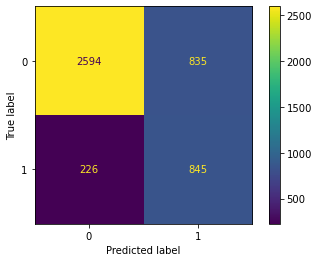

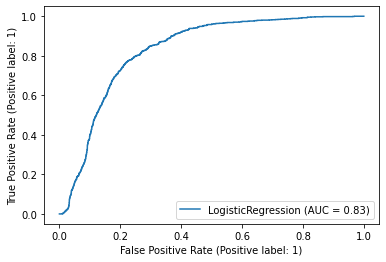

In [43]:
model_helper_function(log_model,X_train_scaled,y_train,X_test_scaled,y_test)


In [44]:
data={'accuracy_score': accuracy_score(y_test,y_pred),'precision_score':precision_score(y_test,y_pred),'recall_score':recall_score(y_test,y_pred),'f1_score':f1_score(y_test,y_pred)}

In [45]:
df_log=pd.DataFrame(data=data,index=['logistic_regression'])
df_log

,accuracy_score,precision_score,recall_score,f1_score
logistic_regression,0.764222,0.502976,0.788982,0.614322


#### Evaluating logistic regression performance results Logistic regression has the precision score of .50, which is not good enough

### Naive bayes classifier 

In [46]:
nb_model=GaussianNB()

In [47]:
nb_model.fit(X_train_scaled,y_train)

GaussianNB()

In [48]:
y_pred = nb_model.predict(X_test_scaled)


              precision    recall  f1-score   support

           0       0.90      0.73      0.81      3429
           1       0.46      0.73      0.57      1071

    accuracy                           0.73      4500
   macro avg       0.68      0.73      0.69      4500
weighted avg       0.79      0.73      0.75      4500



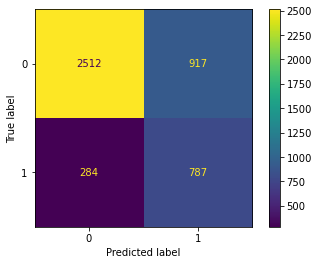

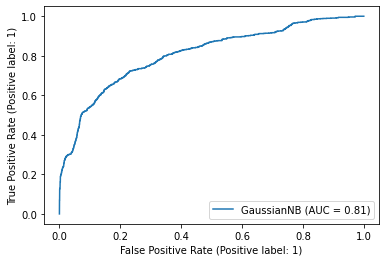

In [49]:
model_helper_function(nb_model,X_train_scaled,y_train,X_test_scaled,y_test)


In [50]:
data={'accuracy_score': accuracy_score(y_test,y_pred),'precision_score':precision_score(y_test,y_pred),
      'recall_score':recall_score(y_test,y_pred),'f1_score':f1_score(y_test,y_pred)}

In [51]:
df_nb=pd.DataFrame(data=data,index=['naive_bayes'])
df_nb

,accuracy_score,precision_score,recall_score,f1_score
naive_bayes,0.733111,0.461854,0.734827,0.567207


#### Evaluating naive bayes classifier performance results Naive bayes classifier has the precision score of .46, which is not good, logistic regression model is performing better than this model. 

In [52]:
df_results = pd.concat([df_log,df_nb])
df_results


,accuracy_score,precision_score,recall_score,f1_score
logistic_regression,0.764222,0.502976,0.788982,0.614322
naive_bayes,0.733111,0.461854,0.734827,0.567207


### Random forest classifier 

In [53]:
rf_model = RandomForestClassifier(class_weight='balanced')

In [54]:
# hyper parameter tuning for random forest using grid search CV
params = {'n_estimators':[50,70,100,120,150],'criterion':['gini','entropy'],'max_depth':[5,7,9,None],'max_features' : ["auto", "sqrt", "log2"]}

In [55]:
# running cross validation with cv = 5
grid_cv=GridSearchCV(rf_model,param_grid=params,cv=5)


In [56]:
%%time
grid_cv.fit(X_train_scaled,y_train)

CPU times: user 3min 18s, sys: 502 ms, total: 3min 19s
Wall time: 3min 19s


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 70, 100, 120, 150]})

In [57]:
grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 50}

In [58]:
rf_model_new = RandomForestClassifier(n_estimators=150,criterion='gini',max_depth=None,max_features='log2',class_weight='balanced')

In [59]:
rf_model_new.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=150)

In [60]:
y_pred = rf_model_new.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.96      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



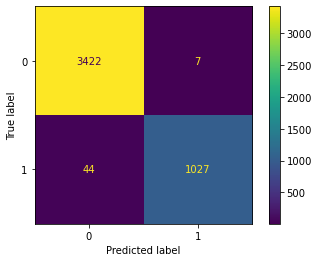

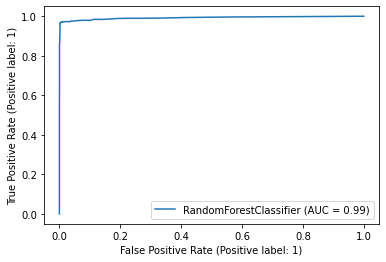

In [61]:
model_helper_function(rf_model_new,X_train_scaled,y_train,X_test_scaled,y_test)

In [62]:
data={'accuracy_score': accuracy_score(y_test,y_pred),'precision_score':precision_score(y_test,y_pred),'recall_score':recall_score(y_test,y_pred),'f1_score':f1_score(y_test,y_pred)}

In [63]:
df_rf = pd.DataFrame(data=data,index=['random forest classifier'])
df_rf

,accuracy_score,precision_score,recall_score,f1_score
random forest classifier,0.988667,0.99323,0.958917,0.975772


Evaluating random forest performance results: Random forest model has the precision score of .99, which is very
good, model is performing better than logistic regression and naive bayes models.

### XGB classifier 

In [64]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective='binary:logistic', random_state=0)



In [65]:
params = {'max_depth':[5,6,7,8,None],'min_child_weight':[1,2,3,4,5],
          'learning_rate':[.1,.2,.3],'n_estimators':[75,100,125]}


In [66]:
grid_cv=GridSearchCV(xgb_model,param_grid=params,cv=5,refit='f1')


In [67]:
%%time
grid_cv.fit(X_train_scaled,y_train)

CPU times: user 9min 33s, sys: 42.1 s, total: 10min 15s
Wall time: 1min 18s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=N

In [68]:
grid_cv.best_params_

{'learning_rate': 0.3,
 'max_depth': 8,
 'min_child_weight': 1,
 'n_estimators': 125}

In [69]:
grid_cv.best_score_

0.9882846707048708

In [70]:
xgb_model_new = XGBClassifier(objective='binary:logistic',random_state=0,learning_rate=0.3,max_depth= 7,min_child_weight= 1,n_estimators= 100)


In [71]:
xgb_model_new.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [72]:
y_pred = xgb_model_new.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.98      0.97      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



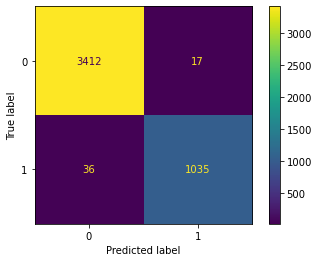

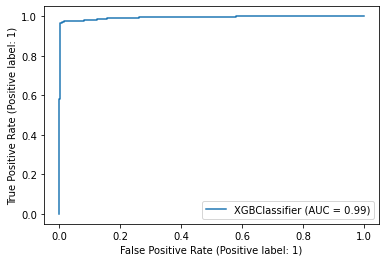

In [73]:
model_helper_function(xgb_model_new,X_train_scaled,y_train,X_test_scaled,y_test)

In [74]:
data={'accuracy_score': accuracy_score(y_test,y_pred),'precision_score':precision_score(y_test,y_pred),'recall_score':recall_score(y_test,y_pred),'f1_score':f1_score(y_test,y_pred)}

Evaluating XGB performance results: XGB model has the precision score of .98, which is very good, model is performing better than logistic regression and naive bayes models but not better than random forest classifier

In [75]:
df_xgb = pd.DataFrame(data=data,index=['XGB classifier'])
df_xgb


,accuracy_score,precision_score,recall_score,f1_score
XGB classifier,0.988222,0.98384,0.966387,0.975035


In [76]:
df_results = pd.concat([df_results,df_xgb])
df_results

,accuracy_score,precision_score,recall_score,f1_score
logistic_regression,0.764222,0.502976,0.788982,0.614322
naive_bayes,0.733111,0.461854,0.734827,0.567207
XGB classifier,0.988222,0.983840,0.966387,0.975035


### Summary 

In [77]:
# sorting df based on precision score
df_results.sort_values('precision_score',ascending=False)


,accuracy_score,precision_score,recall_score,f1_score
XGB classifier,0.988222,0.983840,0.966387,0.975035
logistic_regression,0.764222,0.502976,0.788982,0.614322
naive_bayes,0.733111,0.461854,0.734827,0.567207


Based on the precision score from the above results, the random forest classifier outperforms XGB classifier, logisitic regression and naive bayes models.